# Graded Challenge 1

# Introduction

Nama: Karina Maharani Utomo
<br>
Batch: 003
<br>
Hacktiv8 Full Time Data Science

Graded Challenge ini menggunakan dataset yang di dalamnya terdapat 721 data Pokemon, dengan fitur:

- **#**: ID for each pokemon
- **Name**: Name of each pokemon
- **Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks
- **Type 2**: Some pokemon are dual type and have 2
- **Total**: sum of all stats that come after this, a general guide to how strong a pokemon is
- **HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting
- **Attack**: the base modifier for normal attacks (eg. Scratch, Punch)
- **Defense**: the base damage resistance against normal attacks
- **SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- **SP Def**: the base damage resistance against special attacks
- **Speed**: determines which pokemon attacks first each round

Objektif yang ingin dicapai adalah mengetahui perbandingan pokemon Legendary dan non-Legendary dari nilai Attack yang dimiliki. Maka dari itu, untuk Pokemon Legendary dan Non-Legendary, akan dicari:
1. Pokemon dengan nilai Attack tertinggi dan terendah
2. Tipe Pokemon yang memiliki nilai rata-rata Attack tertinggi dan terendah
3. Kombinasi tipe yang menghasilkan nilai rata-rata Attack tertinggi dan terendah

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [2]:
df = pd.read_csv(r'/Users/karinautomo/Documents/Hacktiv8/GradedChallenge/Pokemon.csv')

In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Terlihat bahwa dataset memiliki 800 baris, tetapi ID (#) dari Pokemon hanya mencapai 721. Setelah ditelusuri, salah satu alasannya adalah karena terdapat beberapa pokemon yang memiliki ID yang sama. Contohnya adalah suatu pokemon dengan versi Mega-nya, seperti Venusaur dan Mega Venusaur

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Terdapat 386 data pada Type 2 yang memiliki missing value. Hal ini karena tidak semua Pokemon berupa dual type

In [8]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Data Cleaning

In [9]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Penamaan ulang Pokemon versi Mega agar lebih efektif

In [10]:
df['Name'] = df['Name'].str.replace(".*(?=Mega)", "")

In [11]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Untuk mengisi data Type 2 yang missing value, akan digunakan data yang tertulis pada Type 1

In [12]:
df['Type 2'].fillna(df['Type 1'], inplace=True)

In [13]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [14]:
df.isnull().sum() # Mengecek kembali untuk memastikan sudah tidak ada missing value

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [15]:
df = df.set_index('Name') # Mengubah index menjadi nama dari Pokemon

In [16]:
df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


# Data Exploration

In [17]:
df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Akan dibuat dua dataset baru, yaitu dataset yang berisi Pokemon Legendary dan Pokemon Non-Legendary

In [18]:
# Dataset Pokemon Legendary
legendary = df[df['Legendary'] == True]

In [19]:
legendary

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Articuno,144,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,145,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,146,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,150,Psychic,Psychic,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [20]:
# Dataset Pokemon Non-Legendary
non_legendary = df[df['Legendary'] == False]

In [21]:
non_legendary

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
GourgeistSuper Size,711,Ghost,Grass,494,85,100,122,58,75,54,6,False
Bergmite,712,Ice,Ice,304,55,69,85,32,35,28,6,False
Avalugg,713,Ice,Ice,514,95,117,184,44,46,28,6,False


Pada dataset df, terdapat 65 Pokemon Legendary dan 735 Pokemon Non-Legendary

In [22]:
legendary.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


In [23]:
non_legendary.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
std,208.590419,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,175.500000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,346.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000
75%,533.500000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000
max,715.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000


Dapat dilihat bahwa Pokemon Legendary memiliki rata-rata yang lebih tinggi dibandingkan Pokemon Non-Legendary, dalam semua aspek. Hal ini mungkin menjadi salah satu alasan mengapa Pokemon Legendary lebih langka dan lebih sulit  diperoleh dibandingkan Pokemon Non-Legendary

## Pokemon dengan Attack tertinggi dan terendah

### Legendary

In [24]:
# Menampilkan 5 Pokemon Legendary dengan Attack paling tinggi
legendary.sort_values('Attack', ascending = False).head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
DeoxysAttack Forme,386,Psychic,Psychic,600,50,180,20,180,20,150,3,True
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
KyuremBlack Kyurem,646,Dragon,Ice,700,125,170,100,120,90,95,5,True


In [25]:
# Menampilkan 5 Pokemon Legendary dengan Attack paling rendah
legendary.sort_values('Attack', ascending = False).tail()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Registeel,379,Steel,Steel,580,80,75,150,75,150,50,3,True
Suicune,245,Water,Water,580,100,75,115,90,115,85,2,True
Uxie,480,Psychic,Psychic,580,75,75,130,75,130,95,4,True
DeoxysDefense Forme,386,Psychic,Psychic,600,50,70,160,70,160,90,3,True
Regice,378,Ice,Ice,580,80,50,100,100,200,50,3,True


Untuk **Pokemon Legendary**, Pokemon dengan Attack tertinggi adalah **Mega Mewtwo X** dan Pokemon dengan Attack terendah adalah **Regice**

### Non-Legendary

In [26]:
# Menampilkan 5 Pokemon Non-Legendary dengan Attack paling tinggi
non_legendary.sort_values('Attack',ascending=False).head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Mega Heracross,214,Bug,Fighting,600,80,185,115,40,105,75,2,False
Mega Garchomp,445,Dragon,Ground,700,108,170,115,120,95,92,4,False
Mega Gallade,475,Psychic,Fighting,618,68,165,95,65,115,110,4,False
Mega Banette,354,Ghost,Ghost,555,64,165,75,93,83,75,3,False
Rampardos,409,Rock,Rock,495,97,165,60,65,50,58,4,False


In [27]:
# Menampilkan 5 Pokemon Non-Legendary dengan Attack paling rendah
non_legendary.sort_values('Attack',ascending=False).tail()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Blissey,242,Normal,Normal,540,255,10,10,75,135,55,2,False
Shuckle,213,Bug,Rock,505,20,10,230,10,230,5,2,False
Magikarp,129,Water,Water,200,20,10,55,15,20,80,1,False
Happiny,440,Normal,Normal,220,100,5,5,15,65,30,4,False
Chansey,113,Normal,Normal,450,250,5,5,35,105,50,1,False


Sedangkan untuk **Pokemon Non-Legendary**, Pokemon dengan Attack tertinggi adalah **Mega Heracross** dan Pokemon dengan Attack terendah adalah **Chansey**

## Tipe Pokemon dengan rata-rata Attack tertinggi dan terendah

Untuk bagian ini, hanya akan dilihat dari Type 1

### Legendary

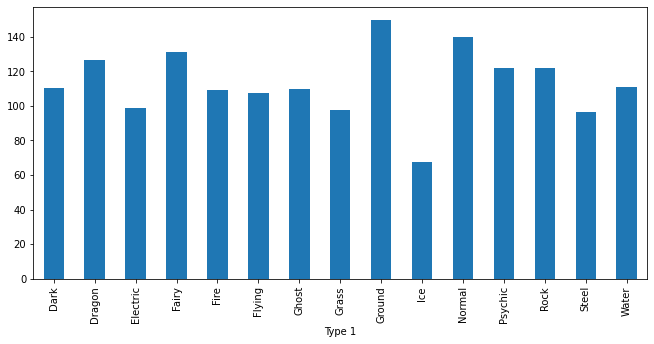

In [28]:
# Membuat plot nilai rata-rata Attack semua tipe Pokemon Legendary
legendary.groupby('Type 1')['Attack'].mean().plot(y = 'Attack', kind = 'bar', figsize = (11, 5))

In [29]:
# Menampilkan tipe dengan nilai rata-rata Attack tertinggi
legendary.groupby('Type 1')['Attack'].mean().nlargest(1)

Type 1
Ground    150.0
Name: Attack, dtype: float64

In [30]:
# Menampilkan tipe dengan nilai rata-rata Attack terendah
legendary.groupby('Type 1')['Attack'].mean().nsmallest(1)

Type 1
Ice    67.5
Name: Attack, dtype: float64

Untuk **Pokemon Legendary**, tipe Pokemon yang memiliki **rata-rata Attack tertinggi** adalah **Ground**. Sedangkan tipe yang memiliki **rata-rata Attack terendah** adalah **Ice**

### Non-Legendary

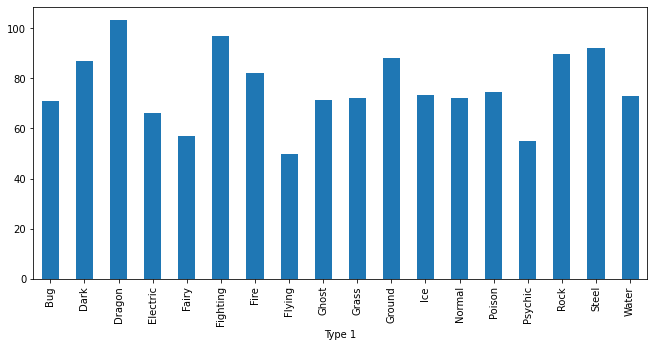

In [31]:
# Membuat plot nilai rata-rata Attack dari semua tipe Pokemon Non-Legendary
non_legendary.groupby('Type 1')['Attack'].mean().plot(kind = 'bar', figsize = (11, 5))

In [32]:
# Menampilkan tipe dengan nilai rata-rata Attack tertinggi
non_legendary.groupby('Type 1')['Attack'].mean().nlargest(1)

Type 1
Dragon    103.4
Name: Attack, dtype: float64

In [33]:
# Menampilkan tipe dengan nilai rata-rata Attack terendah
non_legendary.groupby('Type 1')['Attack'].mean().nsmallest(1)

Type 1
Flying    50.0
Name: Attack, dtype: float64

Untuk **Pokemon Non-Legendary**, tipe Pokemon yang memiliki **rata-rata Attack tertinggi** adalah **Dragon**. Sedangkan tipe yang memiliki **rata-rata Attack terendah** adalah **Flying**

##  Kombinasi tipe Pokemon dengan rata-rata Attack tertinggi dan terendah

Untuk bagian ini, hanya akan dilihat dari Pokemon yang bersifat dual type (Pokemon dengan Type 1 dan Type 2 yang berbeda)

### Legendary

In [34]:
# Menseleksi data Pokemon Legendary yang bersifat dual type
legend_type2 = legendary[
    (legendary['Type 1'] != legendary['Type 2'])
]

In [35]:
legend_type2.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Articuno,144,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,145,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,146,Fire,Flying,580,90,100,90,125,85,90,1,True
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Lugia,249,Psychic,Flying,680,106,90,130,90,154,110,2,True


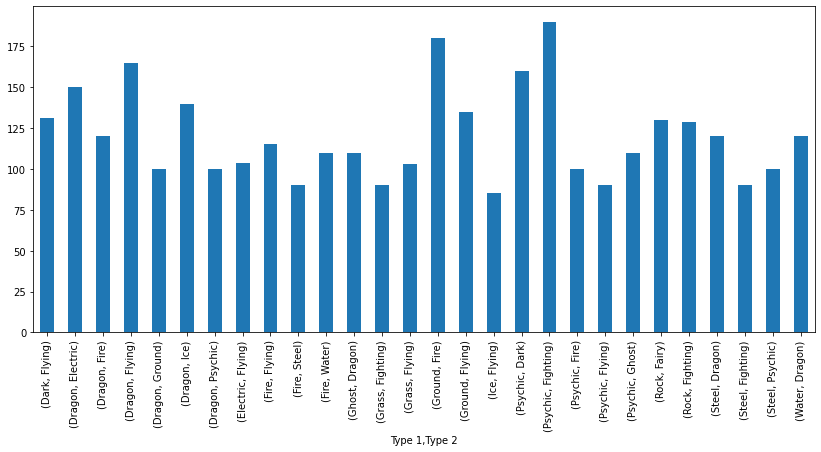

In [36]:
# Membuat plot nilai rata-rata Attack dari semua kombinasi tipe Pokemon Legendary
legend_type2.groupby(['Type 1', 'Type 2'])['Attack'].mean().plot(kind = 'bar', figsize = (14, 6))

In [37]:
a = legend_type2.groupby(['Type 1', 'Type 2'])['Attack'].mean()

In [38]:
# Menampilkan kombinasi tipe dengan nilai rata-rata Attack tertinggi
a.nlargest(1)

Type 1   Type 2  
Psychic  Fighting    190.0
Name: Attack, dtype: float64

In [39]:
# Menampilkan kombinasi tipe dengan nilai rata-rata Attack terendah
a.nsmallest(1)

Type 1  Type 2
Ice     Flying    85.0
Name: Attack, dtype: float64

Untuk **Pokemon Legendary**, kombinasi tipe dengan **rata-rata Attack tertinggi** adalah **Psychic/Fighting**. Sedangkan kombinasi tipe dengan **rata-rata Attack terendah** adalah **Ice/Flying**

### Non-Legendary

In [40]:
# Menseleksi data Pokemon Non-Legendary yang bersifat dual type
non_legend_type2 = non_legendary[
    (non_legendary['Type 1'] != non_legendary['Type 2'])
]

In [41]:
non_legend_type2

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
GourgeistSmall Size,711,Ghost,Grass,494,55,85,122,58,75,99,6,False
GourgeistLarge Size,711,Ghost,Grass,494,75,95,122,58,75,69,6,False
GourgeistSuper Size,711,Ghost,Grass,494,85,100,122,58,75,54,6,False


In [42]:
# non_legend_type2.groupby(['Type 1', 'Type 2'])['Attack'].mean().plot(kind = 'bar', figsize = (19, 7))
# apabila dilakukan plot secara sekaligus, hasilnya tidak terlihat dengan baik

(0.0, 165.0)

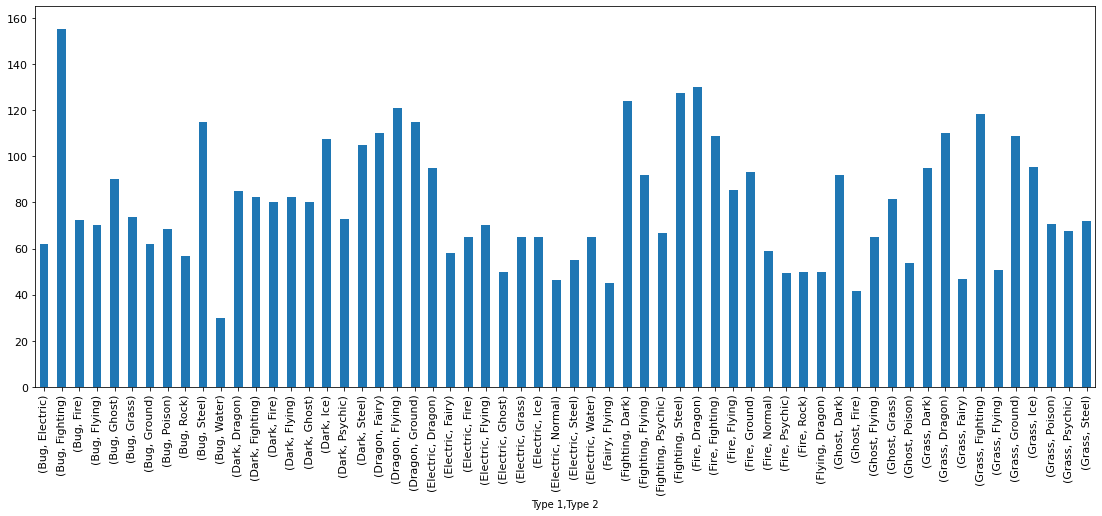

In [43]:
# Membuat plot nilai rata-rata Attack dari semua kombinasi tipe Pokemon Non-Legendary
non_legend_type2.groupby(['Type 1', 'Type 2'])['Attack'].mean().head(60).plot(kind = 'bar', figsize = (19, 7), fontsize = 11)
plt.ylim([0, 165])

(0.0, 165.0)

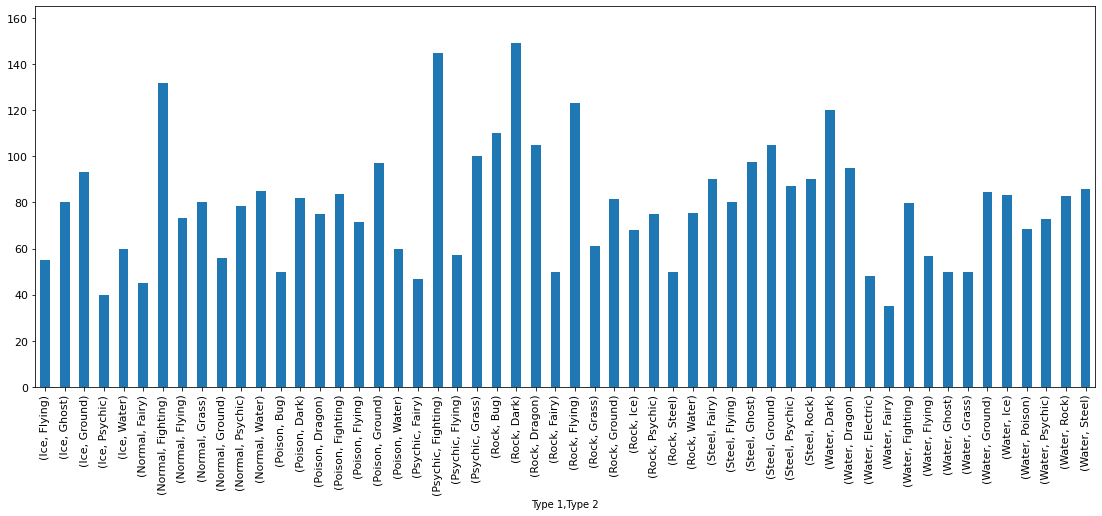

In [44]:
# Dibagi menjadi 2 plot agar lebih terlihat
non_legend_type2.groupby(['Type 1', 'Type 2'])['Attack'].mean().tail(54).plot(kind = 'bar', figsize = (19, 7), fontsize = 11)
plt.ylim([0, 165]) 

In [45]:
b = non_legend_type2.groupby(['Type 1', 'Type 2'])['Attack'].mean()

In [46]:
# Menampilkan kombinasi tipe dengan nilai rata-rata Attack tertinggi
b.nlargest(1)

Type 1  Type 2  
Bug     Fighting    155.0
Name: Attack, dtype: float64

In [48]:
# Menampilkan Pokemon dengan tipe Bug/Fighting
non_legend_type2[
    (non_legend_type2['Type 1'] == 'Bug') &
    (non_legend_type2['Type 2'] == 'Fighting')
]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Heracross,214,Bug,Fighting,500,80,125,75,40,95,85,2,False
Mega Heracross,214,Bug,Fighting,600,80,185,115,40,105,75,2,False


In [47]:
# Menampilkan kombinasi tipe dengan nilai rata-rata Attack terendah
b.nsmallest(1)

Type 1  Type 2
Bug     Water     30.0
Name: Attack, dtype: float64

In [49]:
# Menampilkan Pokemon dengan tipe Bug/Water
non_legend_type2[
    (non_legend_type2['Type 1'] == 'Bug') &
    (non_legend_type2['Type 2'] == 'Water')
]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Surskit,283,Bug,Water,269,40,30,32,50,52,65,3,False


Untuk **Pokemon Non-Legendary**, kombinasi tipe dengan **rata-rata Attack tertinggi** adalah **Bug/Fighting**. Sedangkan kombinasi tipe dengan **rata-rata Attack terendah** adalah **Bug/Water**

# Conclusions

Dari analisis yang sudah dilakukan, berikut adalah kesimpulan yang didapat, beserta nilai Attack atau rata-rata Attack-nya:
<br>
<br>
**1. Pokemon dengan nilai Attack tertinggi dan terendah adalah:**
- Mega Mewtwo X (190) dan Regice (50), untuk Pokemon Legendary
- Mega Heracross (185) dan Chansey (5), untuk Pokemon Non-Legendary

**2. Tipe Pokemon dengan nilai rata-rata Attack tertinggi dan terendah adalah:**
- Tipe Ground (150) dan tipe Ice (67,5), untuk Pokemon Legendary
- Tipe Dragon (103,4) dan tipe Flying (50), untuk Pokemon Non-Legendary

**3. Kombinasi tipe Pokemon dengan nilai rata-rata Attack tertinggi dan terendah adalah:**
- Kombinasi Psychic/Fighting (190) dan kombinasi Ice/Flying (85), untuk Pokemon Legendary
- Kombinasi Bug/Fighting (155) dan kombinasi Bug/Water (30), untuk Pokemon Non-Legendary

Kesimpulan yang didapat bisa dijadikan salah satu pertimbangan pada saat memilih Pokemon yang ingin digunakan. Akan tetapi, terdapat hal lainnya yang perlu dipertimbangkan juga, seperti Type dari Pokemon yang digunakan oleh lawan karena setiap Type memiliki strengths dan weaknesses masing-masing

Dari kesimpulan juga dapat dilihat bahwa untuk Type 1 yang sama, kombinasi dari Type 2 yang berbeda-beda dapat sangat memengaruhi nilai Attack dari suatu Pokemon. Contoh perbandingannya adalah:
- Heracross dan Mega Heracross, yang merupakan Pokemon tipe Bug/Fighting, dengan nilai Attack 185 dan 125
- Surskit, yang merupakan Pokemon tipe Bug/Water, dengan nilai Attack 30